In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss, mean_squared_error, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD
from imblearn.over_sampling import SMOTE

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/Competition House Prices/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Competition House Prices/test.csv')

df=train.append(test)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
missing = df.isnull().sum()[df.isnull().sum() > 0]
missing_df = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(df)}).sort_values(by = 'NaN_percentage', ascending = False)
missing_df.head(10)

,NaN_count,NaN_percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [ ]:
df = df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [ ]:
num_cols = [i for i in df.columns if df[i].dtype in ['int', 'float']]
cat_cols = [i for i in df.columns if df[i].dtype == 'object']

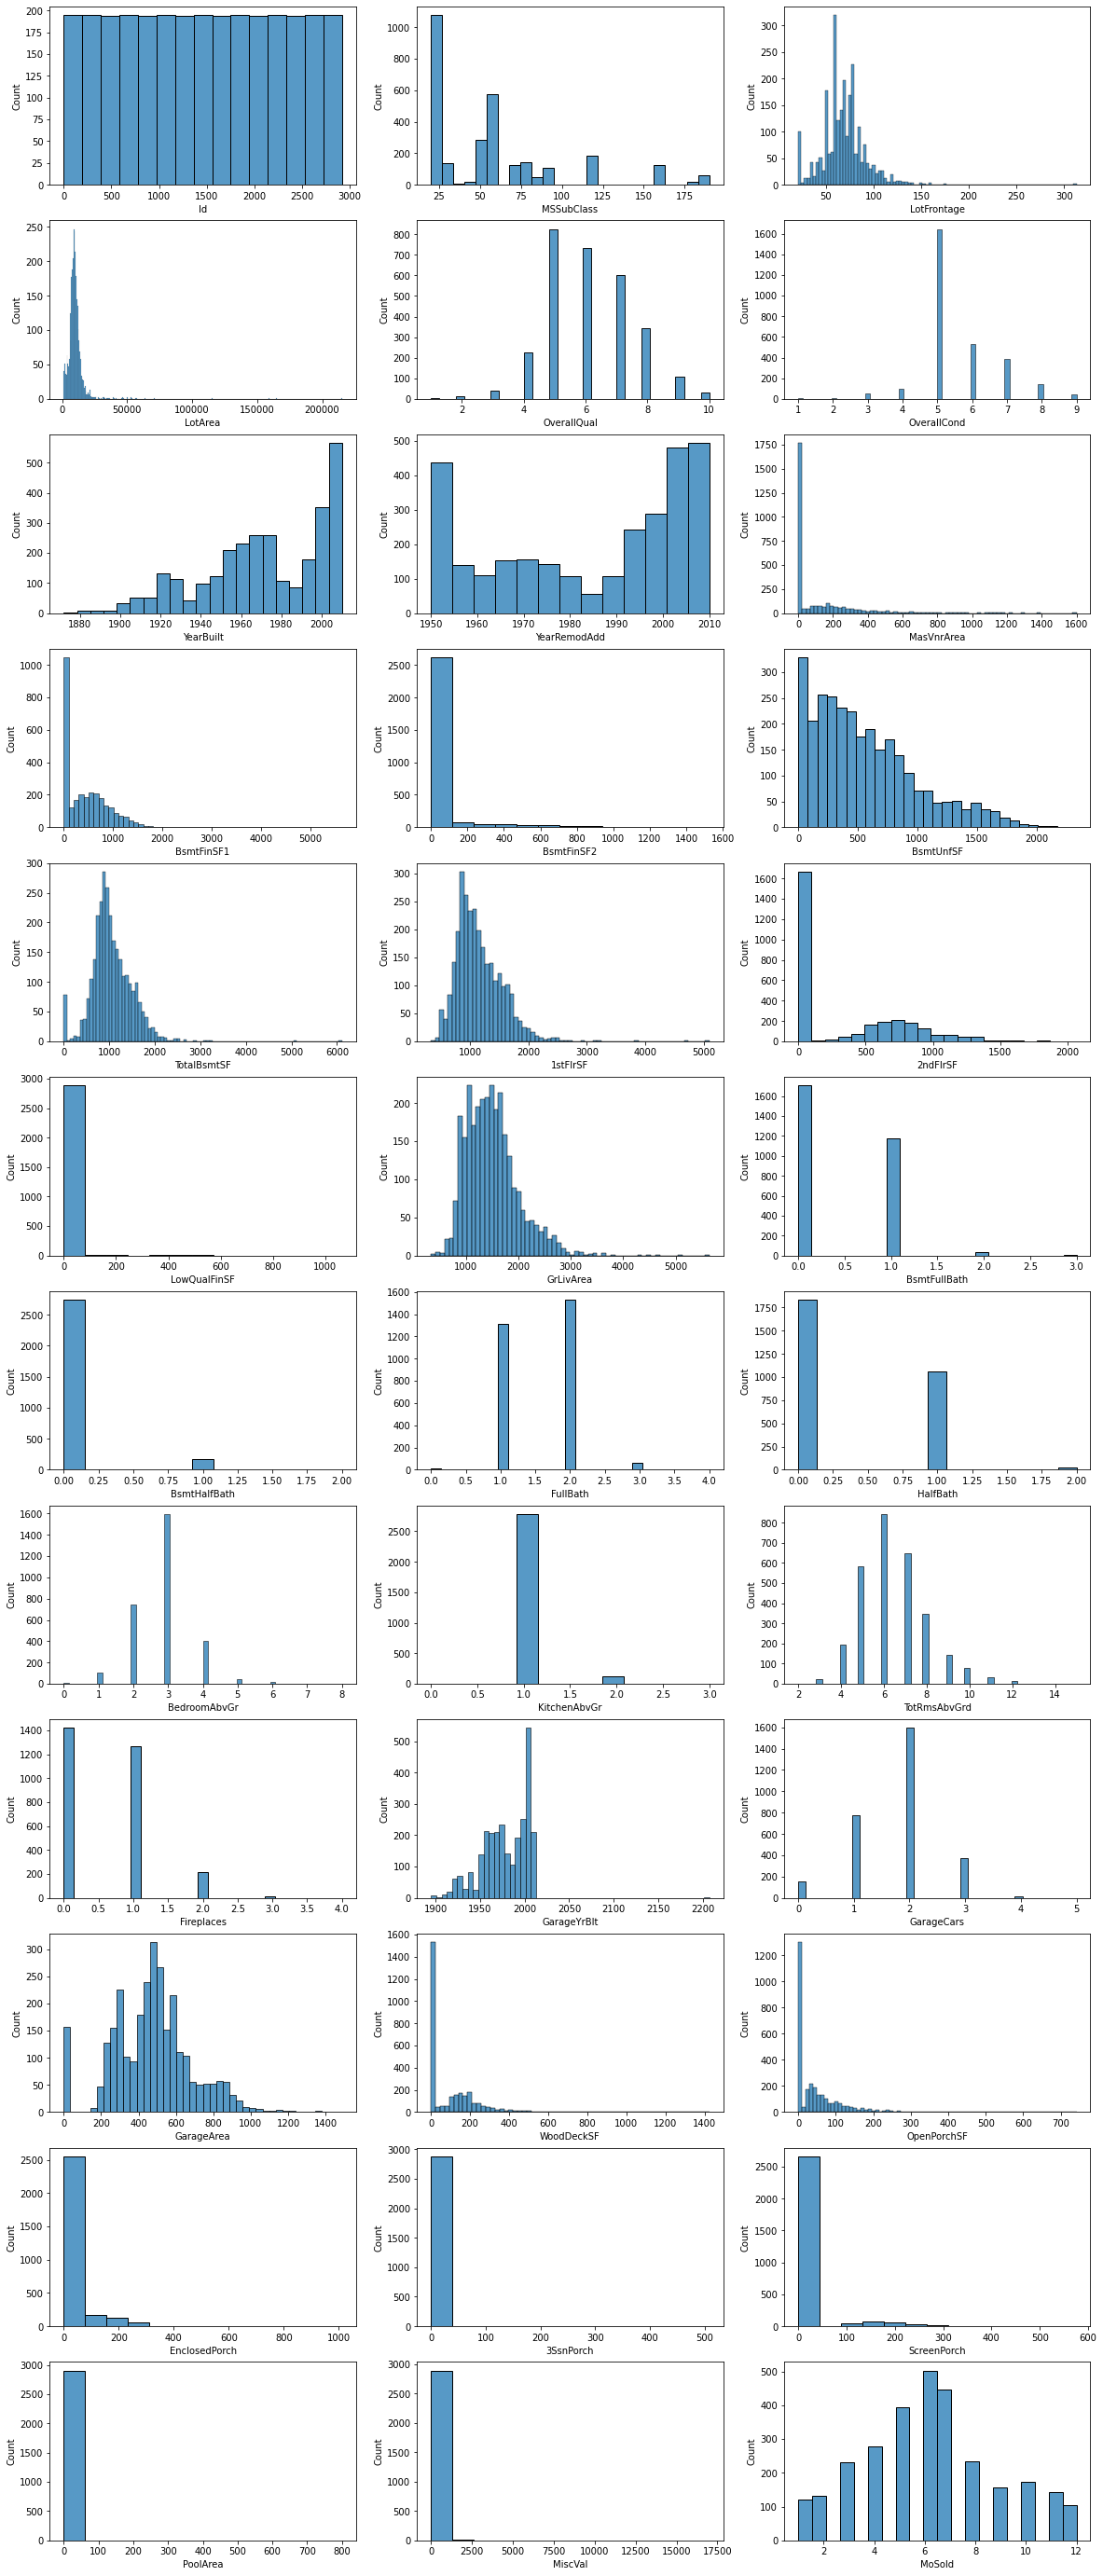

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
 
fig, ax = plt.subplots(12, 3, figsize = (20, 50))
c = 0
for i in range(12):
    for j in range(3):
        if c == 36:
            break
        sns.histplot(x = df.reset_index(drop=True)[num_cols[c]], ax = ax[i, j])
        c += 1
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols=df.describe().columns.tolist()
num_cols.remove('Id')
# num_cols.remove('Id')

#     onehot encoding
df=pd.get_dummies(df, drop_first=True)

#     Fill missing values using k-Nearest Neighbors
imp = KNNImputer(n_neighbors=10, weights="uniform")

ID=df.pop('Id')
df=pd.DataFrame(imp.fit_transform(df), columns=df.columns)
df['Id'] = ID.tolist()

df[num_cols]=np.log(df[num_cols]+1)

#     scaling data for NN
scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

for col in num_cols:
    df[col] = df_normalized[col]

In [ ]:
train_prepared=df.loc[df['Id'].isin(train['Id'])]
test_prepared=df.loc[df['Id'].isin(test['Id'])]

In [ ]:
from sklearn.model_selection import train_test_split

tr, val=train_test_split(train_prepared.drop('Id', axis=1), test_size=0.3, random_state=42)

In [ ]:
X_train, X_valid = tr.drop('SalePrice', axis=1), val.drop('SalePrice', axis=1)
Y_train, Y_valid = tr.SalePrice, val.SalePrice

X_train=X_train.values
X_valid=X_valid.values
Y_train=Y_train.values
Y_valid=Y_valid.values

In [ ]:
import tensorflow as tf
from tensorflow import keras 

np.random.seed(42)
tf.random.set_seed(42)

lstm_mult_model2 = keras.models.Sequential([
    keras.layers.Dense(150, activation='relu', input_shape=[1, X_train.shape[1]],
                       kernel_initializer='random_normal', bias_initializer='zeros'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0015)

lstm_mult_model2.compile(loss="mse", optimizer= optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

lstm_mult_model2.summary()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min',
                                               restore_best_weights=True)


In [ ]:
model = keras.Sequential()
model.add(Dense(units = 232, activation='relu', input_dim= 232)) #input layer
model.add(Dense(units = 2048, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 256, activation='relu')) #hidden layer
model.add(Dense(units = 1)) # output layer

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history_mult_lstm2 = model.fit(X_train, Y_train, epochs=500, batch_size=25,
                    validation_data=(X_valid, Y_valid), callbacks=[early_stopping], verbose=0)

NameError: ignored

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=16,
    epochs=50,
    validation_data=(X_valid, Y_valid),
)


Epoch 1/50
64/64 [==============================] - 2s 30ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - val_loss: 0.1363 - val_root_mean_squared_error: 0.3692
Epoch 2/50
64/64 [==============================] - 1s 22ms/step - loss: 0.0156 - root_mean_squared_error: 0.1249 - val_loss: 0.1373 - val_root_mean_squared_error: 0.3705
Epoch 3/50
64/64 [==============================] - 1s 21ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.1385 - val_root_mean_squared_error: 0.3721
Epoch 4/50
64/64 [==============================] - 1s 22ms/step - loss: 0.0091 - root_mean_squared_error: 0.0955 - val_loss: 0.1299 - val_root_mean_squared_error: 0.3604
Epoch 5/50
64/64 [==============================] - 1s 22ms/step - loss: 0.0080 - root_mean_squared_error: 0.0894 - val_loss: 0.1287 - val_root_mean_squared_error: 0.3587
Epoch 6/50
64/64 [==============================] - 1s 21ms/step - loss: 0.0063 - root_mean_squared_error: 0.0796 - val_loss: 0.1323 - val_root_m

In [ ]:
pred=model.predict(X_valid)

14/14 [==============================] - 0s 6ms/step


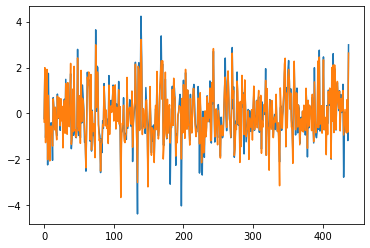

In [ ]:
from matplotlib import pyplot as plt

plt.plot(Y_valid.reshape(-1))
plt.plot(pred.reshape(-1))

In [ ]:
scaler = StandardScaler()
scaler.fit(np.log(train[['SalePrice']]+1))

pred=scaler.inverse_transform(pred)

In [ ]:
pred=model.predict(test_prepared.drop(['Id', 'SalePrice'], axis=1).values)
pred=scaler.inverse_transform(pred)

46/46 [==============================] - 0s 6ms/step


In [ ]:
test['SalePrice']=(np.exp(pred.reshape(-1))-1)
test[['Id', 'SalePrice']].astype({"Id": int, "SalePrice": float}).to_csv('submission.csv', index=False)

In [ ]:
test[['Id', 'SalePrice']].astype({"Id": int, "SalePrice": float})

,Id,SalePrice
0,1461,117124.851562
1,1462,154837.828125
2,1463,176375.921875
3,1464,195658.937500
4,1465,199725.312500
...,...,...
1454,2915,82486.664062
1455,2916,78366.242188
1456,2917,160246.406250
1457,2918,126108.453125
